# Random(a, b) from Random(0, 1)

By Pablo Muñoz Haro, https://github.com/pablo-munoz

This Jupyter Notebook is mentioned in the following medium post:

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import math

In [2]:
def plot_histogram(sample):
    '''
    Utility function to plot a histogram of a sample of the numbers
    produced by the random number generators.
    SAMPLE: list of numbers.
    
    Code for beautifying histogram for discrete data inspired by
    https://stackoverflow.com/a/30121210
    '''
    data = np.array(sample)
    d = np.diff(np.unique(data)).min()
    left_of_first_bin = data.min() - float(d)/2
    right_of_last_bin = data.max() + float(d)/2
    plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d), ec='black')

In [3]:
lower_bound = 5
upper_bound = 15
sample_size = 10000

In [4]:
def bad_random(low, high):
    '''
    Returns a normally distributed number between low and high.
    LOW: number, the lowest number to possibly generate
    HIGH: number, the biggest number to possibly generate
    '''
    return sum(random.randint(0, 1) for _ in range(high - low)) + low

In [5]:
random_sample_bad = [bad_random(lower_bound, upper_bound) for _ in range(sample_size)]

In [6]:
print("Min: {}, Max: {}".format(min(random_sample_bad), max(random_sample_bad)))

Min: 5, Max: 15


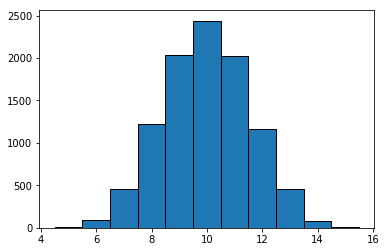

In [7]:
plot_histogram(random_sample_bad)

In order to remedy this situation we have to come up with a random function where each number in the range is equally likely. I developed the idea of a method that randomized the bits in a bitstring.

In [8]:
def almost_good_random(low, high):
    '''
    Returns uniformly distributed random numbers within [low, high*],
    where high* is the closest but bigger or equal power of 2 to HIGH.
    LOW: number, the lowest number to possibly generate
    HIGH: number, the biggest number to possibly generate
    '''
    bit_count = math.ceil(math.log(high-low, 2))
    randnum = 0
    for _ in range(bit_count):
        randnum = (randnum << 1) + random.randint(0, 1)
    return randnum + low

In [9]:
random_sample_almost_good = [almost_good_random(lower_bound, upper_bound) for _ in range(sample_size)]

In [10]:
print("Min: {}, Max: {}".format(min(random_sample_almost_good), max(random_sample_almost_good)))

Min: 5, Max: 20


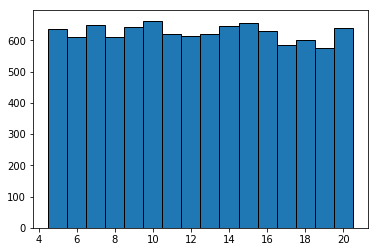

In [11]:
plot_histogram(random_sample_almost_good)

In [12]:
def good_random(low, high):
    '''
    Returns uniformly distributed random numbers within [low, high].
    LOW: number, the lowest number to possibly generate
    HIGH: number, the biggest number to possibly generate
    '''
    bit_count = math.ceil(math.log(high-low, 2))
    randnum = math.inf
    while randnum > (high-low):
        randnum = 0
        for _ in range(bit_count):
            randnum = (randnum << 1) + random.randint(0, 1)
    return randnum + low

In [13]:
random_sample_good = [good_random(lower_bound, upper_bound) for _ in range(sample_size)]

In [14]:
print("Min: {}, Max: {}".format(min(random_sample_good), max(random_sample_good)))

Min: 5, Max: 15


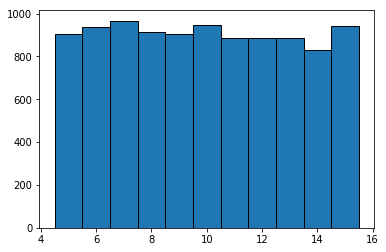

In [15]:
plot_histogram(random_sample_good)